In [ ]:
#-----
# Model 1: stim dependant parameters only

# Based on the functions and tutorial scripts available online at:
# https://hddm.readthedocs.io/en/latest/
#-----

In [6]:
#import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki
sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [7]:
data = pd.read_csv("PDL_data_discrimination_all.csv", sep = ";")
data.head()

,subj_idx,participant_log,session_number_log,trial_number,condition_log,stim,split_by,reward,answer_log,choice_code,response,rt,contingency,reinforcement,feedback,q-init,cumulative_reward,predeterminedlist,prop
0,1,PRIMA1_063,1,1,0.0,control,1,NR,no,0,1,1.174,non-contingent,no,0,0.5,0.0,yes,0.579
1,1,PRIMA1_063,1,2,0.4,easy,3,NR,yes,1,1,0.968,non-contingent,no,0,0.5,0.0,yes,0.905
2,1,PRIMA1_063,1,3,0.0,control,1,NR,yes,1,0,1.177,non-contingent,no,0,0.5,0.0,yes,0.579
3,1,PRIMA1_063,1,4,0.0,control,1,NR,yes,1,0,0.611,non-contingent,no,0,0.5,0.0,yes,0.579
4,1,PRIMA1_063,1,5,0.2,difficult,2,NR,yes,1,1,0.492,non-contingent,no,0,0.5,0.0,yes,0.750


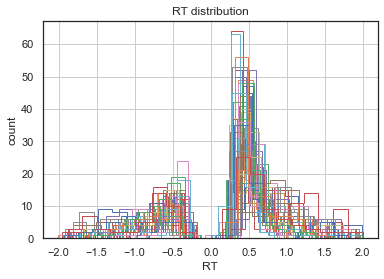

In [8]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel = 'RT', ylabel = 'count', title = 'RT distribution')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins = 20, histtype = 'step', ax = ax)
    
    plt.savefig('Reactions times Pooled.pdf')

In [10]:
from kabuki.analyze import gelman_rubin

models = []
for i in range (3):
    DDM1 = hddm.HDDM(data, depends_on = {'a': ['stim'], 't': ['stim'], 'v': ['stim']}, p_outlier = 0.05, bias = False)
    DDM1.find_starting_values()
    DDM1.sample(20000, burn = 15000, dbname = 'traces.db', db = 'pickle')
    models.append(DDM1)
    
np.max(list(gelman_rubin(models).values()))

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 20001 of 20000 complete in 14190.3 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 20001 of 20000 complete in 14086.9 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 20001 of 20000 complete in 13371.3 sec

1.0025052871042504

In [11]:
M1_concat = kabuki.utils.concat_models(models)

Plotting a(control)
Plotting a(difficult)
Plotting a(easy)


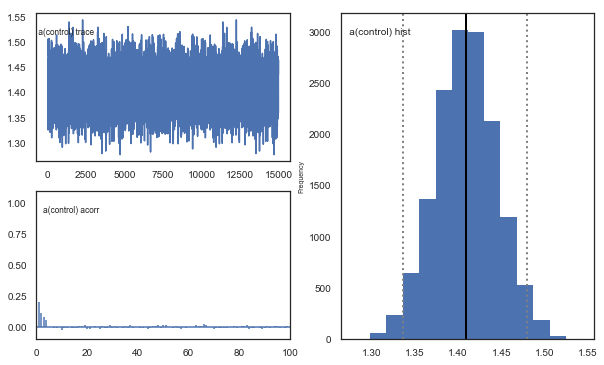

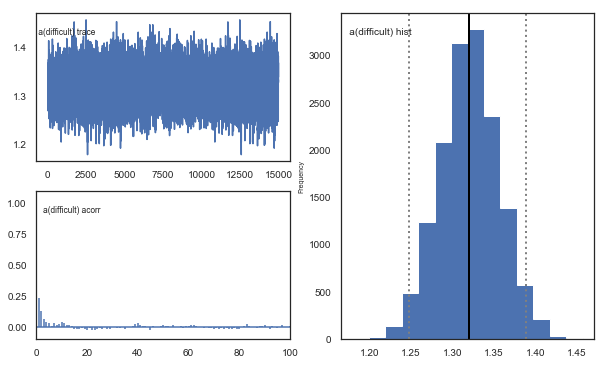

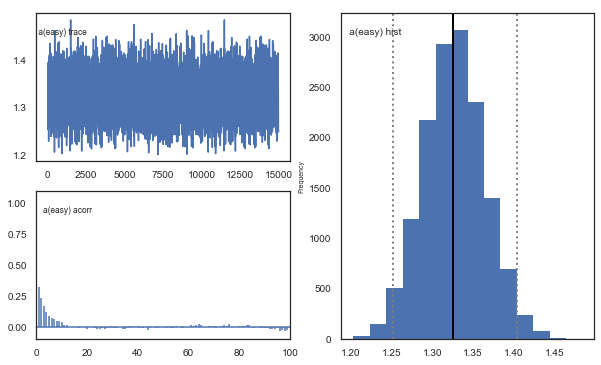

In [12]:
M1_concat.plot_posteriors(['a'])

Plotting t(control)
Plotting t(difficult)
Plotting t(easy)


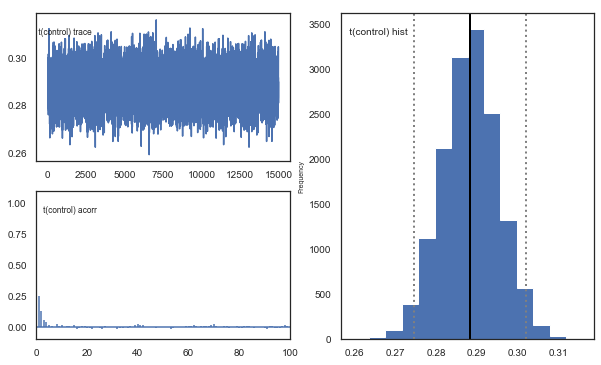

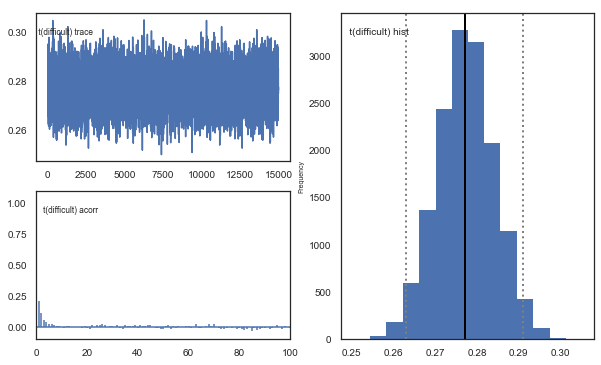

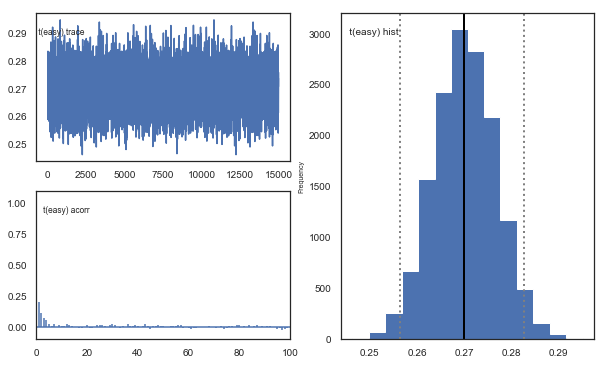

In [13]:
M1_concat.plot_posteriors(['t'])

Plotting v(control)
Plotting v(difficult)
Plotting v(easy)


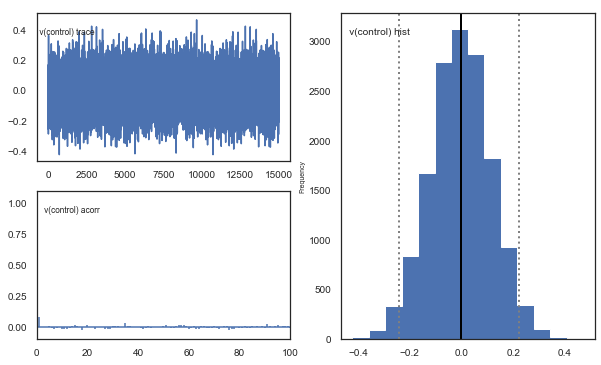

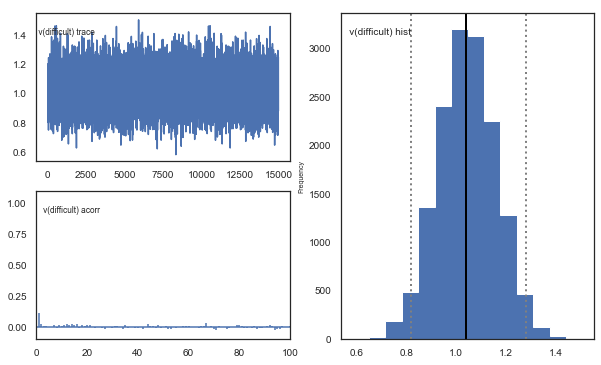

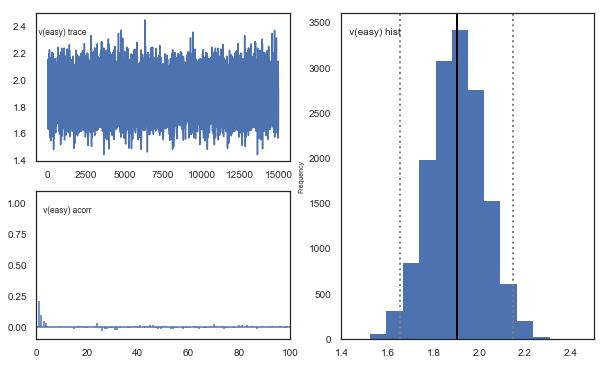

In [14]:
M1_concat.plot_posteriors(['v'])

In [17]:
M1_concat.print_stats()

                            mean         std        2.5q         25q         50q         75q      97.5q       mc err
a(control)               1.40877   0.0363001     1.33749     1.38421     1.40886     1.43273    1.48046  0.000362046
a(difficult)             1.32026   0.0363031     1.25019      1.2962     1.32023     1.34462    1.39151  0.000431565
a(easy)                  1.32609   0.0385358     1.25146     1.30002     1.32567     1.35107    1.40325  0.000573246
a_std                   0.240714   0.0178817    0.207063    0.228479    0.240166    0.252487   0.277114   0.00024486
a_subj(control).1        1.39133   0.0939121     1.22132     1.32527     1.38776     1.45377    1.58137  0.000983241
a_subj(control).2        1.40053    0.101303     1.21472     1.32953     1.39723     1.46542    1.61414   0.00111742
a_subj(control).3        1.15334    0.101838    0.964926     1.08338     1.14742      1.2198    1.36535   0.00115865
a_subj(control).4        1.42656    0.103179     1.23477     1.3

In [18]:
M01_traces = M1_concat.get_traces()

In [19]:
M01_traces.to_csv(r'C:\Users\Hubsc\OneDrive\Desktop\RepositoryPRIMAS1\HDDM1_Draws.csv', index = False, header = True, sep = ';')

In [20]:
#-----
# PPC(s)
ppc_data = hddm.utils.post_pred_gen(M1_concat)

 [-----------------101%-----------------] 165 of 162 complete in 1340.0 sec

In [21]:
hddm.utils.post_pred_stats(data, ppc_data)

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.703458,0.710717,0.234682,5.269202e-05,0.055128,True,42.450619,0.030931
mean_ub,0.633826,0.662900,0.173321,8.452795e-04,0.030885,True,50.127853,0.167745
std_ub,0.321355,0.279116,0.134305,1.784117e-03,0.019822,True,67.526031,0.314498
10q_ub,0.351000,0.403509,0.081081,2.757219e-03,0.009331,True,26.436981,0.647617
30q_ub,0.429000,0.485131,0.109400,3.150672e-03,0.015119,True,34.334351,0.513081
50q_ub,0.518000,0.583498,0.149558,4.289988e-03,0.026658,True,38.707367,0.437945
70q_ub,0.683000,0.727007,0.212518,1.936650e-03,0.047101,True,48.904892,0.207076
90q_ub,1.106400,1.013311,0.343410,8.665601e-03,0.126596,True,66.700844,0.271073
mean_lb,-0.783929,-0.672731,0.197538,1.236484e-02,0.051386,True,25.346209,0.562916
